In [3]:
#Implementing a one-layer Neural Network
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops


In [12]:
ops.reset_default_graph()
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])


In [14]:
# Create graph session
sess = tf.Session()

In [16]:
# make results reproducible
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [18]:
# Split data into train/set = 80%/20%
#replace=True: 可以从a 中反复选取同一个元素。 
#replace=False: a 中同一个元素只能被选取一次。
#https://blog.csdn.net/silverdemon/article/details/77596343
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace = False)
test_indices = np.array(list(set(range(len(x_vals)))-set(train_indices)))
#np.random.choice抽选的是index
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]


In [26]:
#Normalize by column(min-max norm)
def normalize_cols(m):
    col_max = m.max(axis = 0)
    col_min = m.min(axis = 0)
    return (m-col_min)/(col_max-col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))
#why use np.nan_to_num ???


In [28]:
#Declare batch size
batch_size = 50

#Initialize placeholders
x_data = tf.placeholder(shape = [None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)


In [35]:
#Create variables for both NN layer
#参考图
hidden_layer_nodes = 10
A1 = tf.Variable(tf.random_normal(shape = [3,hidden_layer_nodes]))#inputs->hidden nodes
b1 = tf.Variable(tf.random_normal(shape = [hidden_layer_nodes])) #one biases for each hidden node
A2 = tf.Variable(tf.random_normal(shape = [hidden_layer_nodes,1]))#hidden inputs-> 1 output
b2 = tf.Variable(tf.random_normal(shape = [1]))# 1 bias for the output

#Declare model operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

#Declare loss function (MSE)
loss = tf.reduce_mean(tf.square(y_target-final_output))

#Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

In [97]:
#Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

#Training loop
loss_vec = []
test_loss = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict= {x_data:rand_x, y_target:rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target:rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict = {x_data:x_vals_test, y_target:np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if(i + 1)%50 == 0:
        print('Generation: ' + str(i + 1) + '.Loss = ' + str(temp_loss))
        

Generation: 50.Loss = 0.36262324
Generation: 100.Loss = 0.27875817
Generation: 150.Loss = 0.14257848
Generation: 200.Loss = 0.178713
Generation: 250.Loss = 0.11980855
Generation: 300.Loss = 0.12021868
Generation: 350.Loss = 0.08024751
Generation: 400.Loss = 0.1142622
Generation: 450.Loss = 0.121889
Generation: 500.Loss = 0.116752


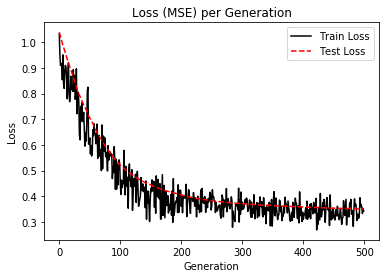

In [98]:
%matplotlib inline
#Plot loss (MSE over time
plt.plot(loss_vec, 'k-',label = 'Train Loss')
plt.plot(test_loss, 'r--',label = 'Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc = 'upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()